In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

In [63]:
sns.set(style="dark", palette="muted", color_codes=True)

# 1. 生成数据

数据为$y=\sin(x)+\epsilon$, $\epsilon \sim N(0, \sigma)$

In [57]:
n_train_sample = 10
n_test_sample = 100
sigma = 0.15

x_train = np.linspace(0.0, 1.0, n_train_sample).reshape(-1,1)
y_train = np.sin(x_train*2*np.pi)+np.random.normal(0.0, sigma, x_train.shape)

x_test = np.random.uniform(0.0, 1.0, n_test_sample).reshape(-1,1)
y_test = np.sin(x_test*2*np.pi)+np.random.normal(0.0, sigma, x_test.shape)

x_ground_truth = np.linspace(0.0, 1.0, 1000).reshape(-1,1)
y_ground_truth = np.sin(x_ground_truth*2*np.pi)

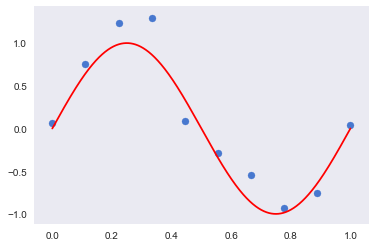

In [58]:
plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')

# 2. 过拟合

MSE_train_set = 0.32134572018038116
 MSE_test_set = 0.23566940769651676


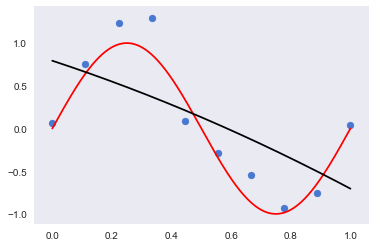

In [59]:
degree = 2
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

MSE_train_set = 0.029445085003020198
 MSE_test_set = 0.03860791709317501


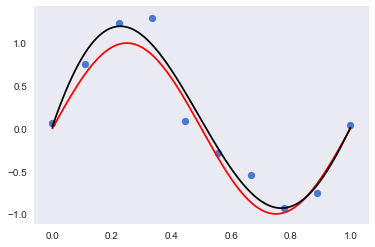

In [60]:
degree = 5
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

MSE_train_set = 7.102383719952929e-22
 MSE_test_set = 0.21123275002767344


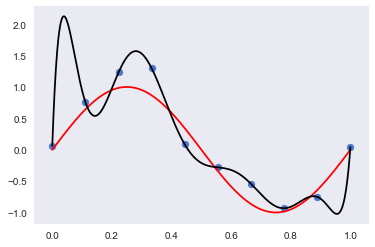

In [61]:
degree = 9
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.322,0.235,-1.498,nan,nan,nan,nan,nan,nan,nan,nan
2,0.321,0.236,-1.149,-0.349,nan,nan,nan,nan,nan,nan,nan
3,0.032,0.043,11.553,-33.825,22.317,nan,nan,nan,nan,nan,nan
4,0.031,0.043,12.661,-39.421,31.293,-4.488,nan,nan,nan,nan,nan
5,0.029,0.039,10.150,-18.485,-27.885,63.344,-27.133,nan,nan,nan,nan
6,0.016,0.066,-1.174,121.215,-629.169,1225.309,-1060.721,344.530,nan,nan,nan
7,0.015,0.066,-6.995,217.274,-1198.809,2836.001,-3409.580,2049.111,-487.023,nan,nan
8,0.004,0.113,37.650,-683.064,5592.060,-22782.176,49925.004,-60174.570,37609.108,-9524.033,nan
9,0.000,0.211,133.127,-2888.417,25456.487,-116102.602,304164.507,-476476.360,441395.987,-223156.666,47473.918


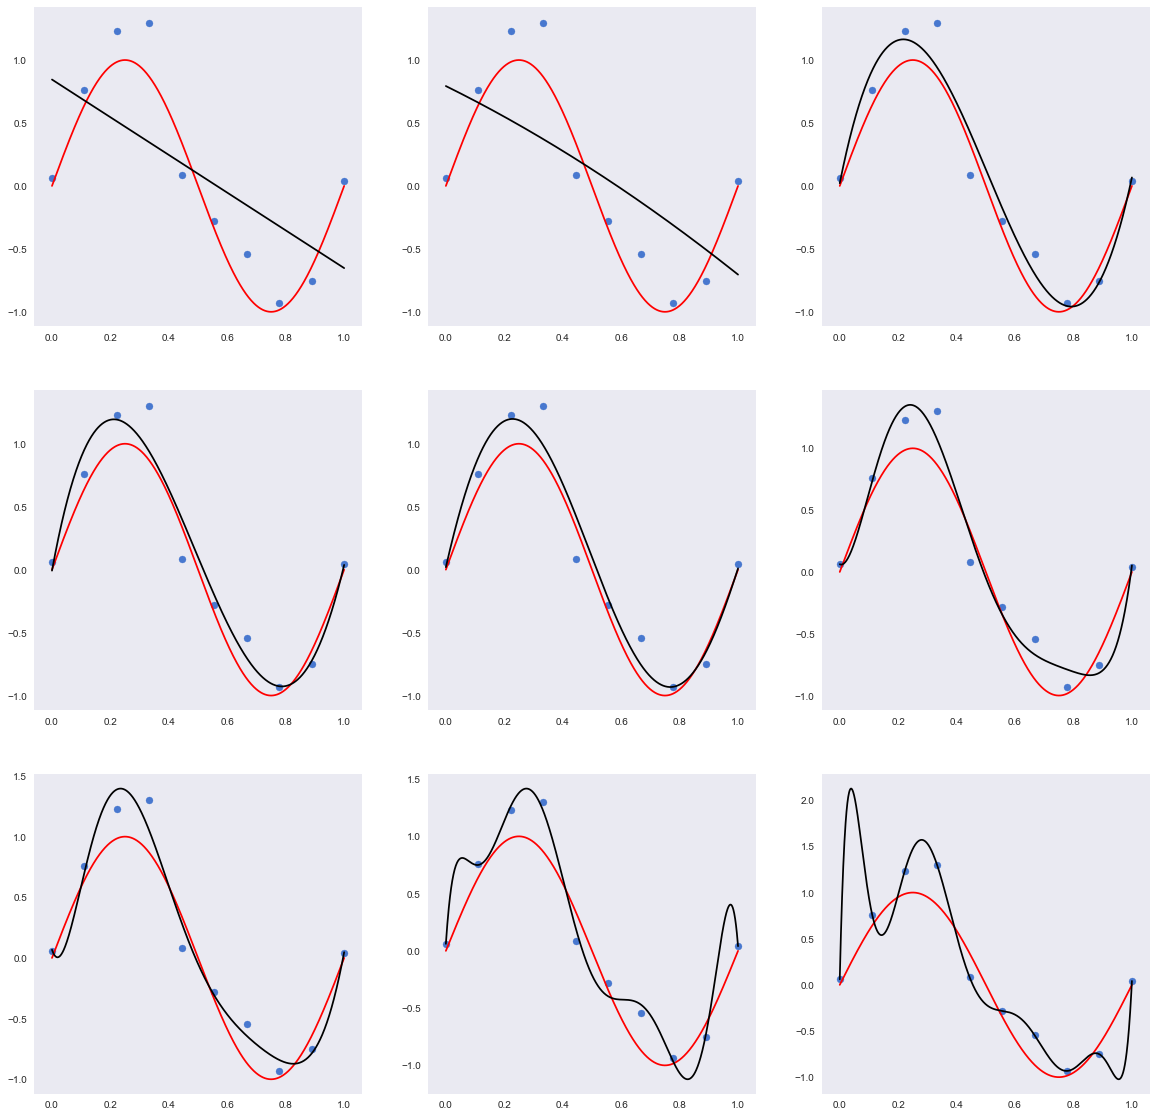

In [155]:
with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train)
        model = LinearRegression()
        model.fit(x_train_tf, y_train)

        MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train, y_train)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

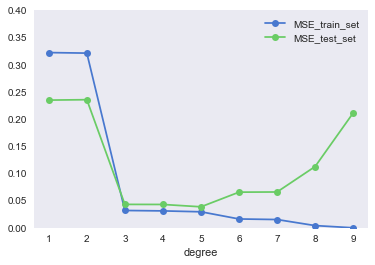

In [154]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

# 3. 解决过拟合
## 方法一. 增加数据量

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.214,0.214,-1.889,nan,nan,nan,nan,nan,nan,nan,nan
2,0.214,0.214,-1.874,-0.015,nan,nan,nan,nan,nan,nan,nan
3,0.028,0.025,11.728,-34.053,22.692,nan,nan,nan,nan,nan,nan
4,0.028,0.025,11.312,-32.179,19.774,1.459,nan,nan,nan,nan,nan
5,0.022,0.020,3.959,19.499,-118.239,156.802,-62.137,nan,nan,nan,nan
6,0.022,0.020,3.998,19.105,-116.661,153.839,-59.529,-0.870,nan,nan,nan
7,0.022,0.019,5.579,-2.406,3.284,-176.598,416.708,-344.932,98.303,nan,nan
8,0.022,0.019,5.493,-0.887,-7.912,-134.505,329.034,-242.574,35.618,15.671,nan
9,0.022,0.019,7.542,-46.593,421.425,-2234.735,6221.225,-10073.894,9672.026,-5104.923,1137.910


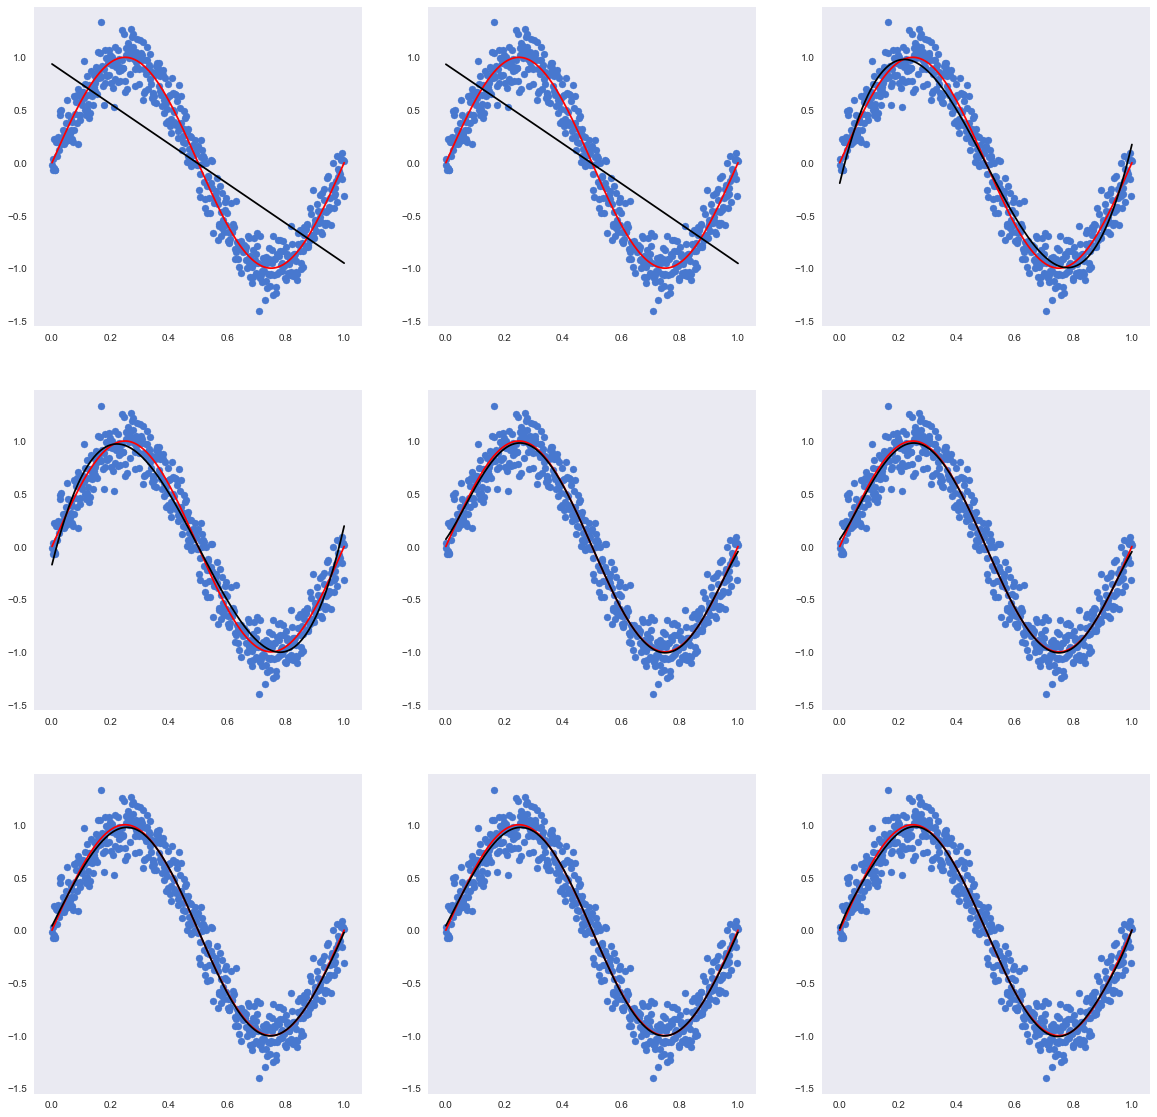

In [158]:
n_train_sample_large = 500

x_train_large = np.linspace(0.0, 1.0, n_train_sample_large).reshape(-1,1)
y_train_large = np.sin(x_train_large*2*np.pi)+np.random.normal(0.0, sigma, x_train_large.shape)

with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train_large)
        model = LinearRegression()
        model.fit(x_train_tf, y_train_large)

        MSE_train_set = mean_squared_error(y_train_large, model.predict(poly.transform(x_train_large)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train_large, y_train_large)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

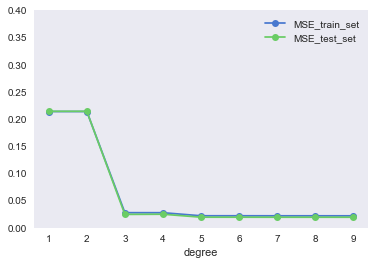

In [159]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

## 方法二：正则化